# **Важно!** 

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание №7. Обучение без учителя. Кластеризация. Снижение размерности данных.

**Цели домашнего задания:** Применить на практике такие методы, как кластеризация и снижение размерности.

# Условия домашней работы

Библиотека scikit-learn (sklearn) предоставляет несколько встроенных наборов данных, которые можно использовать для тестирования алгоритмов кластеризации. Наиболее подходящие:

1. `sklearn.datasets.make_blobs`: Этот набор данных генерирует синтетические кластеры в форме кругов, эллипсов или свободных облаков точек. Он полезен для тестирования алгоритмов кластеризации на наборах данных с явно различимыми кластерами.

2. `sklearn.datasets.make_moons` и `sklearn.datasets.make_circles`: Эти наборы данных также генерируют синтетические кластеры, но в форме полумесяца и круга соответственно. Они полезны для тестирования алгоритмов, которые должны обнаруживать нелинейные связи между точками данных.

3. `sklearn.datasets.load_iris`: Это классический набор данных ирисов Фишера. Он содержит измерения цветков ирисов в трех разных видах. Этот набор данных часто используется для тестирования алгоритмов кластеризации.

4. `sklearn.datasets.load_digits`: Этот набор данных состоит из изображений рукописных цифр от 0 до 9. Он может быть полезным для тестирования алгоритмов кластеризации на задачах с изображениями.

Для тестирования алгоритмов кластеризации вы будем использовать `sklearn.datasets.make_blobs`, `sklearn.datasets.make_moons` и `sklearn.datasets.make_circles`.

In [1]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from sklearn.datasets import (
    make_blobs,
    make_moons,
    make_circles,
    load_iris,
    fetch_openml,
)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Загрузка необходимых датасетов (!!! может занять некоторое время)

# Генерируем синтетические данные с помощью make_blobs
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, random_state=42)

# Генерируем синтетические данные с помощью make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# Генерируем синтетические данные с помощью make_circles
X_circles, y_circles = make_circles(
    n_samples=400, noise=0.05, factor=0.5, random_state=42
)

# Загружаем набор данных Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Загружаем набор данных MNIST
mnist = fetch_openml("mnist_784", version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)  # Преобразуем метки в целочисленный тип

## Часть 1. K-Means. (2 балла)

**Задание 1.1**
Создайте экземпляр класса KMeans, передав в него значение для параметра n_clusters:
n_clusters=4
Сохранить в переменную kmeans_blobs
Пример:
kmeans_something = KMeans(par1=val1)
В качестве эксперимента можете подставить другие значения в параметр n_clusters, формы кластеров изменятся.

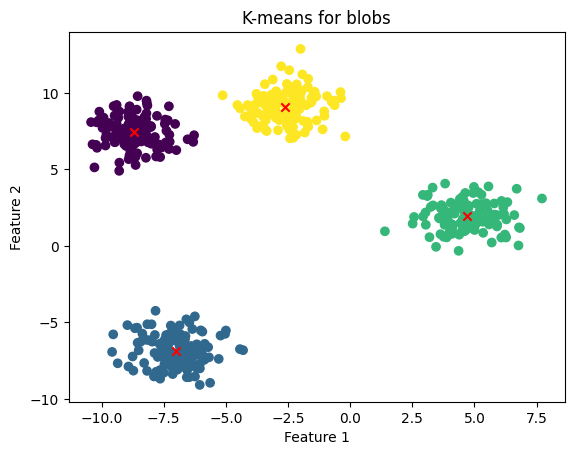

In [8]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
kmeans_blobs = KMeans(n_clusters=4)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
kmeans_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_kmeans_blobs = kmeans_blobs.labels_

# Получаем координаты центроидов кластеров
centroids_kmeans_blobs = kmeans_blobs.cluster_centers_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_kmeans_blobs, cmap="viridis")
plt.scatter(
    centroids_kmeans_blobs[:, 0], centroids_kmeans_blobs[:, 1], marker="x", color="red"
)
plt.title("K-means for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Задание 1.2**
Создайте экземпляр класса KMeans, передав в него значение для параметра n_clusters:
n_clusters=2
Сохранить в переменную kmeans_moons
Пример:
kmeans_something = KMeans(par1=val1)

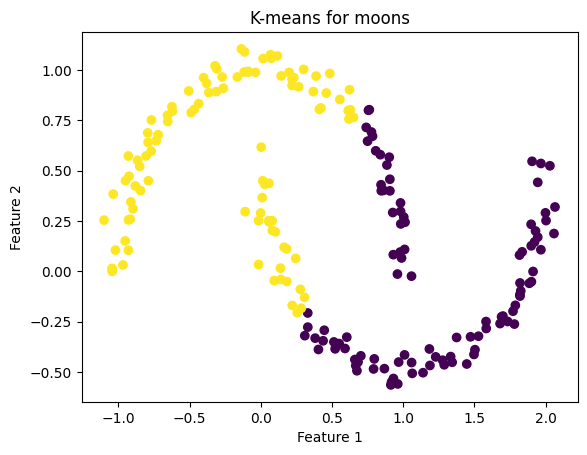

'Можно заметить, что на кластерах невыпуклой формы KMeans работает хуже.'

In [9]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
kmeans_moons = KMeans(n_clusters=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
kmeans_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_kmeans_moons = kmeans_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, cmap="viridis")
plt.title("K-means for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что на кластерах невыпуклой формы KMeans работает хуже."""

**Задание 1.3**
Создайте экземпляр класса KMeans, передав в него значение для параметра n_clusters:
n_clusters=2
Сохранить в переменную kmeans_circles
Пример:
kmeans_something = KMeans(par1=val1)

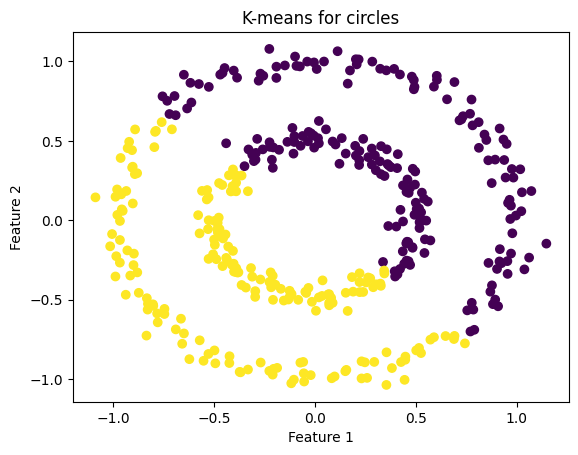

'Аналогично, на вложенных кластерах KMeans работает хуже.'

In [10]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
kmeans_circles = KMeans(n_clusters=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
kmeans_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_kmeans_circles = kmeans_circles.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans_circles, cmap="viridis")
plt.title("K-means for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Аналогично, на вложенных кластерах KMeans работает хуже."""

In [11]:
assert type(kmeans_blobs) == KMeans
assert type(kmeans_moons) == KMeans
assert type(kmeans_circles) == KMeans

## Часть 2. DBSCAN  (2 балла).

**Задание 2.1**
Создайте экземпляр класса DBSCAN, передав в него значение для параметров:
eps=1, min_samples=5
Сохранить в переменную dbscan_blobs
Пример:
dbscan_something = DBSCAN(par1=val1, par2=val2)

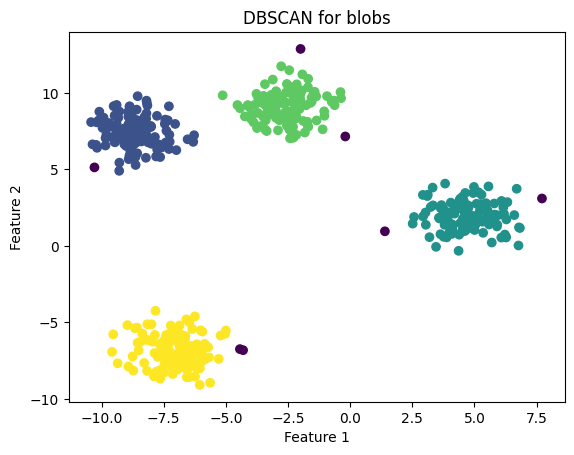

'Можно заметить, что DBSCAN пометил некоторые точки как шумовые'

In [12]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
dbscan_blobs = DBSCAN(eps=1, min_samples=5)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
dbscan_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_dbscan_blobs = dbscan_blobs.labels_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_dbscan_blobs, cmap="viridis")
plt.title("DBSCAN for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN пометил некоторые точки как шумовые"""

**Задание 2.2**
Создайте экземпляр класса DBSCAN, передав в него значение для параметров:
eps=0.3, min_samples=5
Сохранить в переменную dbscan_moons
Пример:
dbscan_something = DBSCAN(par1=val1, par2=val2)

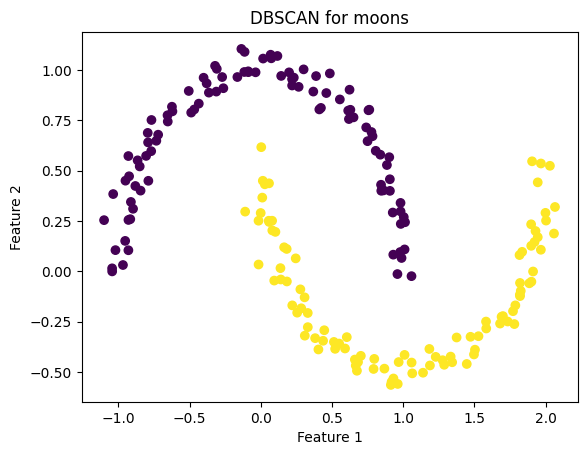

'Можно заметить, что DBSCAN лучше отрабатывает на сложных кластерах, чем K-Means'

In [13]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
dbscan_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_dbscan_moons = dbscan_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan_moons, cmap="viridis")
plt.title("DBSCAN for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN лучше отрабатывает на сложных кластерах, чем K-Means"""

**Задание 2.3**
Создайте экземпляр класса DBSCAN, передав в него значение для параметров:
eps=0.2, min_samples=5
Сохранить в переменную dbscan_circles
Пример:
dbscan_something = DBSCAN(par1=val1, par2=val2)

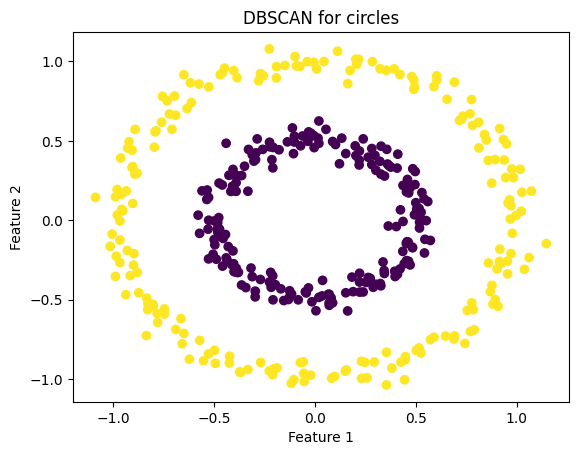

'Можно заметить, что DBSCAN хорошо отрабатывает на вложенных кластерах.\nОднако если передать параметр eps=0.1 или eps=0.5, качество кластеризации ухудшится'

In [14]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
dbscan_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_dbscan_circles = dbscan_circles.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan_circles, cmap="viridis")
plt.title("DBSCAN for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN хорошо отрабатывает на вложенных кластерах.
Однако если передать параметр eps=0.1 или eps=0.5, качество кластеризации ухудшится"""

In [15]:
assert type(dbscan_blobs) == DBSCAN
assert type(dbscan_moons) == DBSCAN
assert type(dbscan_circles) == DBSCAN

## Часть 3. Агломеративная кластеризация  (2 балла).

**Задание 3.1**
Создайте экземпляр класса AgglomerativeClustering, передав в него значение для параметров:
n_clusters=4
Сохранить в переменную agglomerative_blobs
Пример:
agglomerative_something = AgglomerativeClustering(par1=val1)

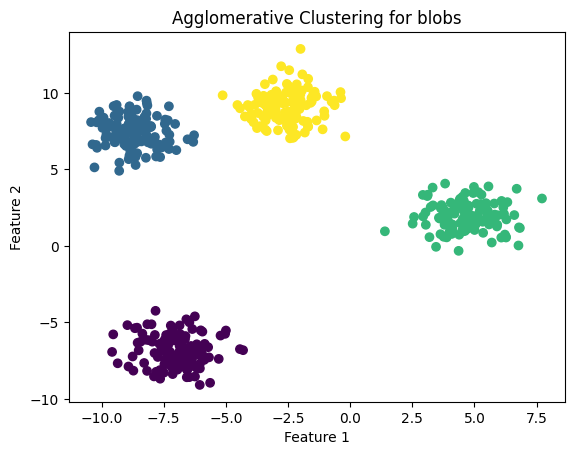

In [17]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
agglomerative_blobs = AgglomerativeClustering(n_clusters=4)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
agglomerative_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_agglomerative_blobs = agglomerative_blobs.labels_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_agglomerative_blobs, cmap="viridis")
plt.title("Agglomerative Clustering for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Задание 3.2**
Создайте экземпляр класса AgglomerativeClustering, передав в него значение для параметров:
n_clusters=2
Сохранить в переменную agglomerative_moons
Пример:
agglomerative_something = AgglomerativeClustering(par1=val1)

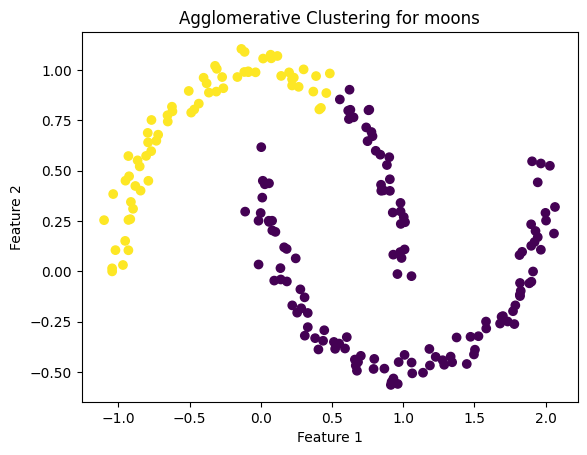

'Можно заметить, что AgglomerativeClustering хуже отрабатывает на сложных кластерах, чем DBSCAN'

In [18]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
agglomerative_moons = AgglomerativeClustering(n_clusters=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
agglomerative_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_agglomerative_moons = agglomerative_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_agglomerative_moons, cmap="viridis")
plt.title("Agglomerative Clustering for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что AgglomerativeClustering хуже отрабатывает на сложных кластерах, чем DBSCAN"""

**Задание 3.3**
Создайте экземпляр класса AgglomerativeClustering, передав в него значение для параметров:
n_clusters=2
Сохранить в переменную agglomerative_circles
Пример:
agglomerative_something = AgglomerativeClustering(par1=val1)

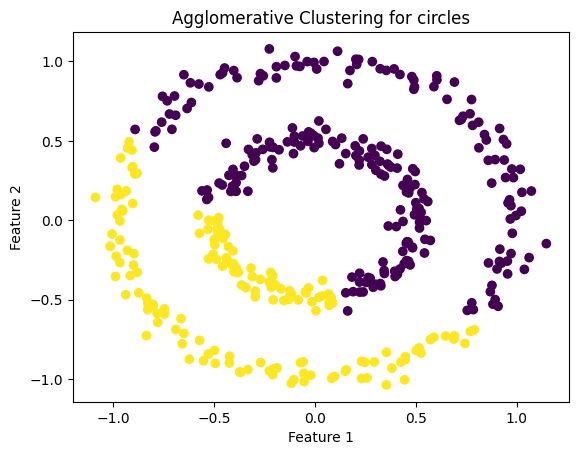

'Можно заметить, что AgglomerativeClustering хуже отрабатывает на вложенных кластерах, чем DBSCAN'

In [19]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
agglomerative_circles = AgglomerativeClustering(n_clusters=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модель на данных
agglomerative_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_agglomerative_circles = agglomerative_circles.labels_

# Визуализируем результаты
plt.scatter(
    X_circles[:, 0], X_circles[:, 1], c=labels_agglomerative_circles, cmap="viridis"
)
plt.title("Agglomerative Clustering for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что AgglomerativeClustering хуже отрабатывает на вложенных кластерах, чем DBSCAN"""

In [20]:
assert type(agglomerative_blobs) == AgglomerativeClustering
assert type(agglomerative_moons) == AgglomerativeClustering
assert type(agglomerative_circles) == AgglomerativeClustering

## Часть 4. PCA  (2 балла).

**Задание 4.1**
Создайте экземпляр класса PCA, передав в него значение для параметров:
n_components=2
Сохранить в переменную pca_iris
Пример:
pca_something = PCA(par1=val1)

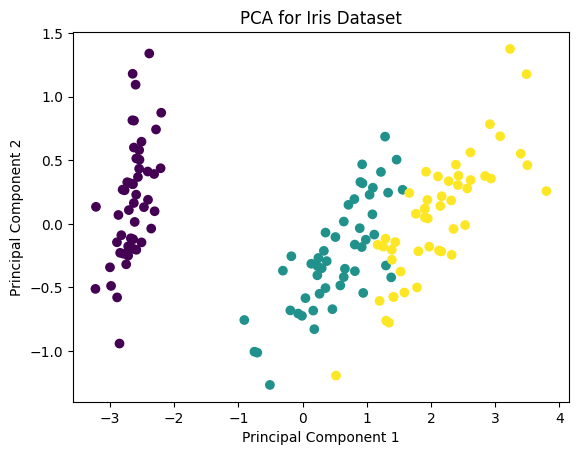

In [21]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
pca_iris = PCA(n_components=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

X_iris_pca = pca_iris.fit_transform(X_iris)

# Визуализируем результаты
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap="viridis")
plt.title("PCA for Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Задание 4.2**
Создайте экземпляр класса PCA, передав в него значение для параметров:
n_components=2
Сохранить в переменную pca_mnist
Пример:
pca_something = PCA(par1=val1)

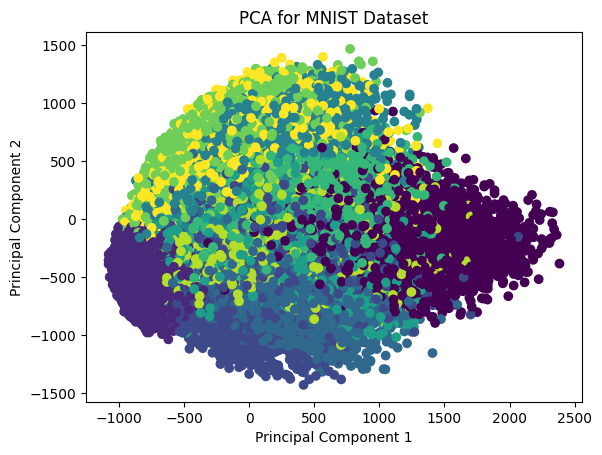

In [22]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
pca_mnist = PCA(n_components=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

X_mnist_pca = pca_mnist.fit_transform(X_mnist)

# Визуализируем результаты
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap="viridis")
plt.title("PCA for MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [23]:
assert type(pca_iris) == PCA
assert type(pca_mnist) == PCA

## Часть 5. t-SNE  (2 балла).

**Задание 5.1**
Создайте экземпляр класса TSNE, передав в него значение для параметров:
n_components=2
Сохранить в переменную tsne_iris
Пример:
tsne_something = TSNE(par1=val1)

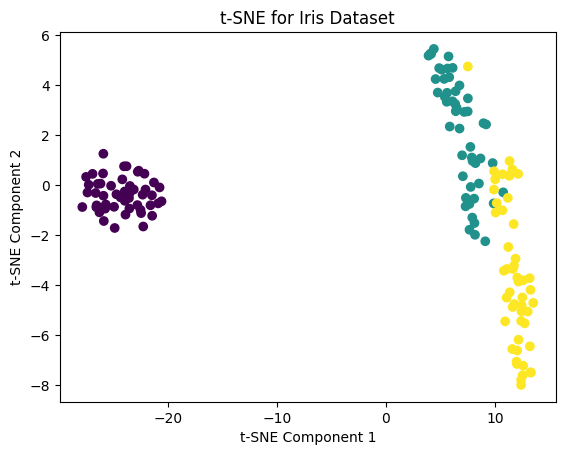

'На небольших датасетах разница в качестве PCA и t-SNE не слишком заметна'

In [24]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
tsne_iris = TSNE(n_components=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

X_iris_tsne = tsne_iris.fit_transform(X_iris)

# Визуализируем результаты
plt.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=y_iris, cmap="viridis")
plt.title("t-SNE for Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

"""На небольших датасетах разница в качестве PCA и t-SNE не слишком заметна"""

**Задание 5.2**
Создайте экземпляр класса TSNE, передав в него значение для параметров:
n_components=2
Сохранить в переменную tsne_mnist
Пример:
tsne_something = TSNE(par1=val1)
!!! Алгоритм может работать несколько минут

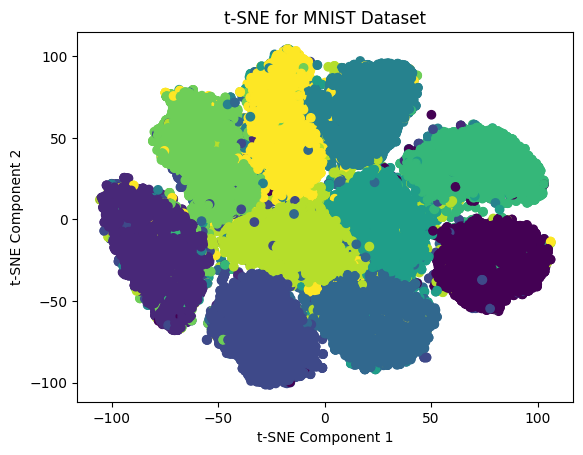

'На бОльших по размеру датасетах разница в качестве PCA и t-SNE заметна, но t-SNE работает значительно дольше.'

In [25]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
tsne_mnist = TSNE(n_components=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)

# Визуализируем результаты
plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap="viridis")
plt.title("t-SNE for MNIST Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

"""На бОльших по размеру датасетах разница в качестве PCA и t-SNE заметна, но t-SNE работает значительно дольше."""

In [26]:
assert type(tsne_iris) == TSNE
assert type(tsne_mnist) == TSNE